In [ ]:
import os
import sys
import requests

client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"


# url = "https://openapi.naver.com/v1/vision/face"    # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('iu.jpg', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code

if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":591,"height":832},"faceCount":1},"faces":[{"celebrity":{"value":"아이유","confidence":1.0}}]}


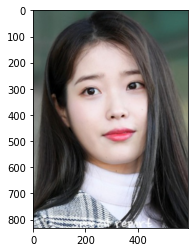

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('iu.jpg')

plt.imshow(img)

In [ ]:
import json

parsed = json.loads(response.text)
parsed

{'info': {'size': {'width': 591, 'height': 832}, 'faceCount': 1},
 'faces': [{'celebrity': {'value': '아이유', 'confidence': 1.0}}]}

In [ ]:
import os
import sys
import requests

client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"


url = "https://openapi.naver.com/v1/vision/face"    # 얼굴 감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('iu.jpg', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code

if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":591,"height":832},"faceCount":1},"faces":[{"roi":{"x":155,"y":230,"width":309,"height":309},"landmark":{"leftEye":{"x":218,"y":308},"rightEye":{"x":380,"y":285},"nose":{"x":322,"y":382},"leftMouth":{"x":259,"y":475},"rightMouth":{"x":387,"y":460}},"gender":{"value":"female","confidence":0.999486},"age":{"value":"21~25","confidence":1.0},"emotion":{"value":"neutral","confidence":1.0},"pose":{"value":"frontal_face","confidence":0.999098}}]}


In [ ]:
import json

result = json.loads(response.text)
result

{'info': {'size': {'width': 591, 'height': 832}, 'faceCount': 1},
 'faces': [{'roi': {'x': 155, 'y': 230, 'width': 309, 'height': 309},
   'landmark': {'leftEye': {'x': 218, 'y': 308},
    'rightEye': {'x': 380, 'y': 285},
    'nose': {'x': 322, 'y': 382},
    'leftMouth': {'x': 259, 'y': 475},
    'rightMouth': {'x': 387, 'y': 460}},
   'gender': {'value': 'female', 'confidence': 0.999486},
   'age': {'value': '21~25', 'confidence': 1.0},
   'emotion': {'value': 'neutral', 'confidence': 1.0},
   'pose': {'value': 'frontal_face', 'confidence': 0.999098}}]}

In [ ]:
result.keys()   # 딕셔너리에서 키값만 추출출

dict_keys(['info', 'faces'])

In [ ]:
result['faces']

[{'roi': {'x': 155, 'y': 230, 'width': 309, 'height': 309},
  'landmark': {'leftEye': {'x': 218, 'y': 308},
   'rightEye': {'x': 380, 'y': 285},
   'nose': {'x': 322, 'y': 382},
   'leftMouth': {'x': 259, 'y': 475},
   'rightMouth': {'x': 387, 'y': 460}},
  'gender': {'value': 'female', 'confidence': 0.999486},
  'age': {'value': '21~25', 'confidence': 1.0},
  'emotion': {'value': 'neutral', 'confidence': 1.0},
  'pose': {'value': 'frontal_face', 'confidence': 0.999098}}]

In [ ]:
result['faces'][0]

{'roi': {'x': 155, 'y': 230, 'width': 309, 'height': 309},
 'landmark': {'leftEye': {'x': 218, 'y': 308},
  'rightEye': {'x': 380, 'y': 285},
  'nose': {'x': 322, 'y': 382},
  'leftMouth': {'x': 259, 'y': 475},
  'rightMouth': {'x': 387, 'y': 460}},
 'gender': {'value': 'female', 'confidence': 0.999486},
 'age': {'value': '21~25', 'confidence': 1.0},
 'emotion': {'value': 'neutral', 'confidence': 1.0},
 'pose': {'value': 'frontal_face', 'confidence': 0.999098}}

In [ ]:
result['faces'][0]['roi']  # 얼굴 위치 정보보

# x 사진에서의 얼굴의 시작점의 x좌표 와 y좌표 얼굴의 우측 하단 width height

{'x': 155, 'y': 230, 'width': 309, 'height': 309}

In [ ]:
result['faces'][0]['gender'] # 성별 정보와 정확도

{'value': 'female', 'confidence': 0.999486}

In [ ]:
result['faces'][0]['age'] # 나이 정보와 정확도

{'value': '21~25', 'confidence': 1.0}

In [ ]:
x,y,w,h = result['faces'][0]['roi'].values()
gender, g_conf = result['faces'][0]['gender'].values()
age, a_conf = result['faces'][0]['age'].values()

In [ ]:
annotation = gender + " : " + str(g_conf) + "\n" + age + " : " + str(a_conf)
annotation

'female : 0.999486\n21~25 : 1.0'

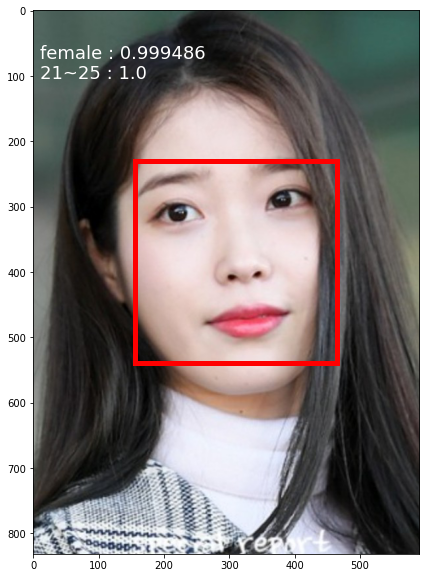

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

img = mpimg.imread('iu.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                             linewidth = 5,
                             edgecolor = 'r',
                             facecolor = 'none'
                             )
ax.add_patch(rect_face)
plt.text(10,100,annotation, wrap=True, fontsize=18, color='white')

plt.show()

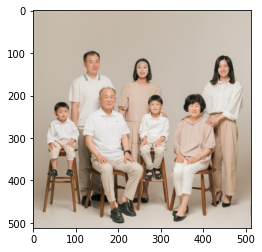

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('family.jpg')

plt.imshow(img)

In [ ]:
import os
import sys
import requests
import json

client_id = "rPMUM8SWlz5zWx6o_uTY"
client_secret = "4NTWhmt4MR"


url = "https://openapi.naver.com/v1/vision/face"    # 얼굴 감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식

files = {'image': open('202303103.png', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

result = json.loads(response.text)
result

{'info': {'size': {'width': 1522, 'height': 887}, 'faceCount': 14},
 'faces': [{'roi': {'x': 691, 'y': 80, 'width': 90, 'height': 90},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.999873},
   'age': {'value': '28~32', 'confidence': 0.407177},
   'emotion': {'value': 'neutral', 'confidence': 0.896018},
   'pose': {'value': 'part_face', 'confidence': 0.647146}},
  {'roi': {'x': 211, 'y': 111, 'width': 89, 'height': 89},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.780473},
   'age': {'value': '18~22', 'confidence': 0.0295088},
   'emotion': {'value': 'talking', 'confidence': 0.892683},
   'pose': {'value': 'part_face', 'confidence': 0.8192}},
  {'roi': {'x': 198, 'y': 479, 'width': 49, 'height': 49},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.993853},
   'age': {'value': '36~40', 'confidence': 0.0538103},
   'emotion': {'value': 'smile', 'confidence': 0.769178},
   'pose': {'value': 'part_face', 'confidence': 0.

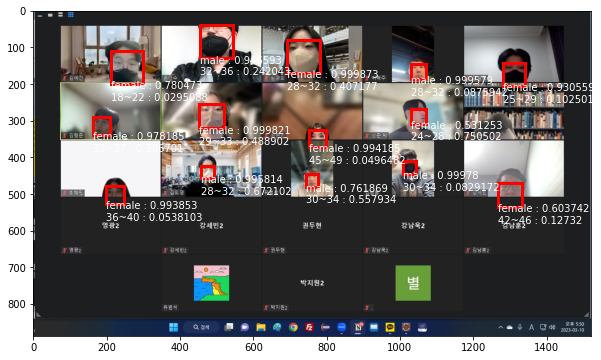

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

img = mpimg.imread('202303103.png')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

for each in result['faces']:

  x,y,w,h = each['roi'].values()
  gender, g_conf = each['gender'].values()
  age, a_conf = each['age'].values()

  rect_face = patches.Rectangle((x,y),w,h,
                              linewidth = 3,
                              edgecolor = 'r',
                              facecolor = 'none'
                              )
  annotation = gender + " : " + str(g_conf) + "\n" + age + " : " + str(a_conf)
  plt.text(x,y+h+40, annotation, wrap=True, fontsize=10, color='white')
  

  ax.add_patch(rect_face)

plt.show()